<a href="https://colab.research.google.com/github/orwel1984/yolov3KerasJupyter/blob/master/Yolo_v3_Object_Detection_using_Keras_%5BCOLAB%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/orwel1984/yolov3KerasJupyter.git

Cloning into 'yolov3KerasJupyter'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 29 (delta 6), reused 24 (delta 3), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [2]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 Mar 16 01:57 .
drwxr-xr-x 1 root root 4096 Mar 16 01:55 ..
drwxr-xr-x 4 root root 4096 Mar  5 14:36 .config
drwxr-xr-x 1 root root 4096 Mar  5 14:37 sample_data
drwxr-xr-x 4 root root 4096 Mar 16 01:57 yolov3KerasJupyter


In [3]:
cd yolov3KerasJupyter/

/content/yolov3KerasJupyter


In [4]:
!nvidia-smi

Tue Mar 16 01:57:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
!apt-get update && apt-get install -y \
  ffmpeg \
  wget

Hit:1 https://download.docker.com/linux/ubuntu bionic InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hi

In [20]:
pip install --no-cache-dir --upgrade pip && \
    pip install --no-cache-dir -r requirements.txt

     |████████████████████████████████| 1.5MB 18.1MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [21]:
!pwd

/content/yolov3KerasJupyter


In [22]:
!ls -la

total 1288
drwxr-xr-x 4 root root    4096 Mar 16 01:57  .
drwxr-xr-x 1 root root    4096 Mar 16 01:57  ..
-rw-r--r-- 1 root root     324 Mar 16 01:57  Dockerfile
drwxr-xr-x 8 root root    4096 Mar 16 01:57  .git
drwxr-xr-x 2 root root    4096 Mar 16 01:57  images
-rw-r--r-- 1 root root     122 Mar 16 01:57  __init__.py
-rw-r--r-- 1 root root    8997 Mar 16 01:57  Model.py
-rw-r--r-- 1 root root     733 Mar 16 01:57  README.md
-rw-r--r-- 1 root root      14 Mar 16 01:57  requirements.txt
-rw-r--r-- 1 root root    3719 Mar 16 01:57  Utils.py
-rw-r--r-- 1 root root    2400 Mar 16 01:57  WeightsReader.py
-rw-r--r-- 1 root root 1265084 Mar 16 01:57 'Yolo-v3 Object Detection using Keras.ipynb'


In [23]:
# IoU Threshold
iou_thresh = 0.6

# Objectness Threshold
obj_thresh = 0.6

In [24]:
net_h, net_w = 416, 416

# 3 anchor boxes (width,height) pairs
anchors = [ [[116, 90], [156, 198], [373, 326]], 
             [[30, 61], [62, 45], [59, 119]], 
             [[10, 13], [16, 30], [33, 23]]]


NUM_CLASS = 80

In [25]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-03-16 02:16:50--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  1.88MB/s    in 32s     

2021-03-16 02:17:22 (7.33 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [26]:
from Model import YOLOv3
from tensorflow.keras.layers import Input
from WeightsReader import WeightReader

# create Yolo model
model = YOLOv3(Input(shape=(None, None, 3)), NUM_CLASS);    
#model.summary()

# load the weights trained on COCO into the model
WeightReader("./yolov3.weights").load_weights(model)

In [27]:
import cv2
from Utils import preprocess_image

image_path   =  "./images/maradona_1.jpg"
#image_path   =  "./images/skateboard-protest.jpg"


# load image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_h, image_w, _ = image.shape

# normalize the image data and convert to 4D tensor
input = preprocess_image(image, net_h, net_w)

In [28]:
output = model.predict(input)

In [30]:
from Model import extract_features
import numpy as np

boxes = np.empty([1, 4])
scores = np.empty([1, ])
classes = np.empty([1, 80])

for i in range(len(output)):    
    _, S = output[i].shape[:2]
    
    b, s, c = extract_features( output[i], anchors[i], S, N=3, num_classes=(80), net_wh=(416,416))
    
    boxes = np.concatenate((boxes, b), axis=0)
    scores = np.concatenate((scores, s), axis=0)
    classes = np.concatenate((classes, c), axis=0)

In [31]:
import tensorflow as tf

selected_indices, selected_scores = tf.image.non_max_suppression_with_scores(
                                        boxes, scores, len(boxes), 
                                        iou_threshold=iou_thresh, 
                                        score_threshold=obj_thresh ,
                                        soft_nms_sigma=0.6)

selected_boxes = tf.gather(boxes, selected_indices)
selected_classes = tf.gather(classes, selected_indices)

In [32]:
from Utils import draw_boxes

draw_boxes(image, selected_boxes,selected_classes, selected_scores, image_w, image_h, net_w, net_h)
cv2.imwrite(image_path[:-4] + '_detected' + image_path[-4:], (image).astype('uint8'))

True

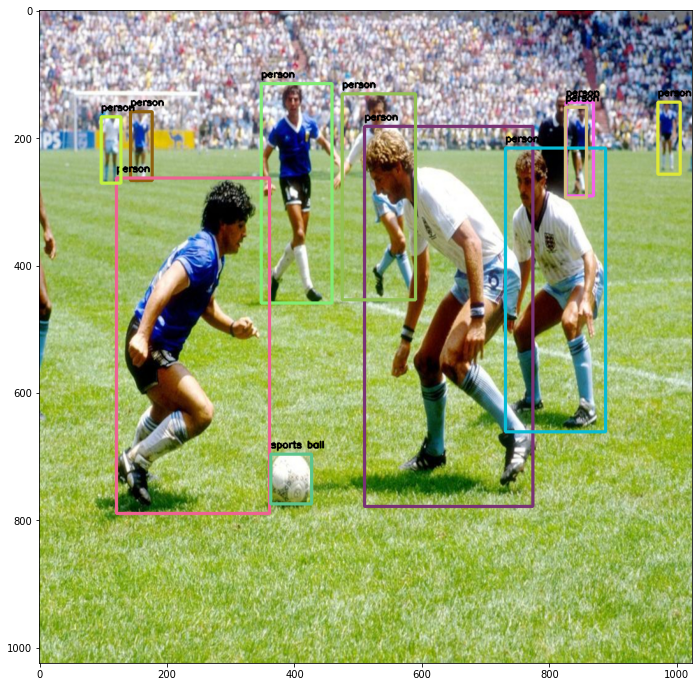

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
axis = fig.add_subplot()
plt.imshow(image)
plt.show()